Build a machine learning model to predict whether the shipment will arrive on time or not. ( column ‘Reached.on.Time_Y.N’ from the attached data needs to be predicted )

You can consider that shipment which would arrive late is a higher risk for business. So, predicting potentially delayed shipments would be a big win so that business can take necessary steps to mitigate the issues.


Evaluation will be based on



*   Missing value imputation method
*   ML model built.
*   Model fine tuning
*   Results

**Step-1: Importing necessary libraries**

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once in a notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a text file.
uploaded = drive.CreateFile({'title': 'Sample file.txt'})
uploaded.SetContentString('Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1z9zOPvRuJqlE65looydiEZJv2Y4NiIVf


In [ ]:
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains 'data (1).csv' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title data (1).csv, id 1zZLrcXAZ2a1muR2rP-y7QyQ-dYJzX4Wk


In [ ]:
import pandas as pd
import numpy as np

In [ ]:

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1zZLrcXAZ2a1muR2rP-y7QyQ-dYJzX4Wk'
downloaded = drive.CreateFile({'id': file_id})

**Step-2: Read data_set**

In [ ]:
downloaded.GetContentFile('data (1).csv')

In [ ]:
data=pd.read_csv('data (1).csv')

**Step-3: Sanity check of data_set**

In [ ]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177.0,3,low,F,44,1233.0,1
1,2,F,Flight,4,5,216.0,2,low,M,59,3088.0,1
2,3,A,Flight,2,2,183.0,4,low,M,48,3374.0,1
3,4,B,Flight,3,3,176.0,4,medium,M,10,1177.0,1
4,5,C,Flight,2,2,184.0,3,medium,F,46,2484.0,1


In [ ]:
data.tail()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10994,10995,A,Ship,4,1,252.0,5,medium,F,1,1538.0,1
10995,10996,B,Ship,4,1,232.0,5,medium,F,6,1247.0,0
10996,10997,C,Ship,5,4,242.0,5,low,F,4,1155.0,0
10997,10998,F,Ship,5,2,223.0,6,medium,M,2,1210.0,0
10998,10999,D,Ship,2,5,155.0,5,low,F,6,1639.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10901 non-null  float64
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10845 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10860 non-null  float64
 11  Reached.on.Time_Y.N  10999 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.0+ MB


In [ ]:
data.isnull().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,98
Prior_purchases,0
Product_importance,154
Gender,0
Discount_offered,0


In [ ]:
numerical_features=["Customer_care_calls",	"Customer_rating","Cost_of_the_Product","Prior_purchases","Discount_offered","Weight_in_gms"]
categorical_features=["Gender","Warehouse_block","Mode_of_Shipment","Product_importance"]

**Missing value imputation**

In [ ]:
#Choose the method of missing value imputation.
#mean,median,mode.
for i in ["Cost_of_the_Product","Weight_in_gms"]:
  data[i].fillna(data[i].mean(),inplace=True)
data["Product_importance"].fillna(data["Product_importance"].mode()[0],inplace=True)



In [ ]:
data.isnull().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


**Step-4:Exploratory data analysis of dataset**

In [ ]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.194386,3.567597,13.373216,3641.667035,0.596691
std,3175.28214,1.141490,1.413603,47.848978,1.522860,16.205527,1624.713529,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,170.000000,3.000000,4.000000,1854.500000,0.000000
50%,5500.00000,4.000000,3.000000,213.000000,3.000000,7.000000,4137.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5042.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7684.000000,1.000000


**#for categorical columns**

In [ ]:
data.describe(include='object')

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5371,5545


**outlier analysis**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

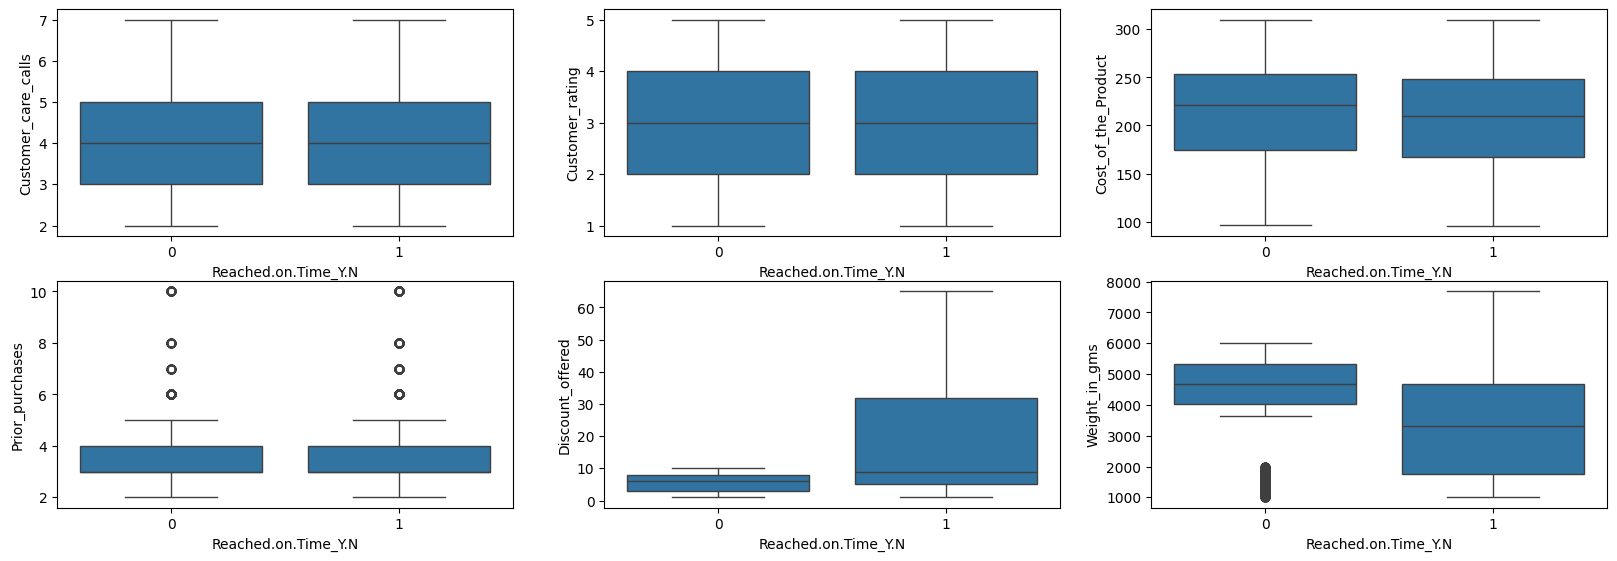

In [ ]:
plt.figure(figsize=(20,10))
j=1
for i in numerical_features:
  plt.subplot(3,3,j)
  j=j+1
  sns.boxplot(data=data,y=i,x="Reached.on.Time_Y.N")
plt.show()


**Outlier treatment**

In [ ]:
#outlier treatment for numerical features
i='Prior_purchases'
q1=data[i].quantile(0.25)
q3=data[i].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
name = data[i]
data=data[(data[i] >= lower_limit) & (data[i] <= upper_limit)]
print("lower_limit",":",lower_limit)
print("upper_limit",":",upper_limit)


lower_limit : 1.5
upper_limit : 5.5


In [ ]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,5467.553421,4.052321,2.986495,210.128940,3.213085,13.442977,3643.196817,0.597439
std,3175.780254,1.151272,1.415952,47.927547,0.972258,16.249371,1625.094153,0.490438
min,1.000000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2720.750000,3.000000,2.000000,170.000000,2.000000,4.000000,1854.750000,0.000000
50%,5445.500000,4.000000,3.000000,213.000000,3.000000,7.000000,4133.500000,1.000000
75%,8224.250000,5.000000,4.000000,251.000000,4.000000,10.000000,5045.000000,1.000000
max,10999.000000,7.000000,5.000000,310.000000,5.000000,65.000000,7684.000000,1.000000


**Check the relaionship between categorical features and Target variables**

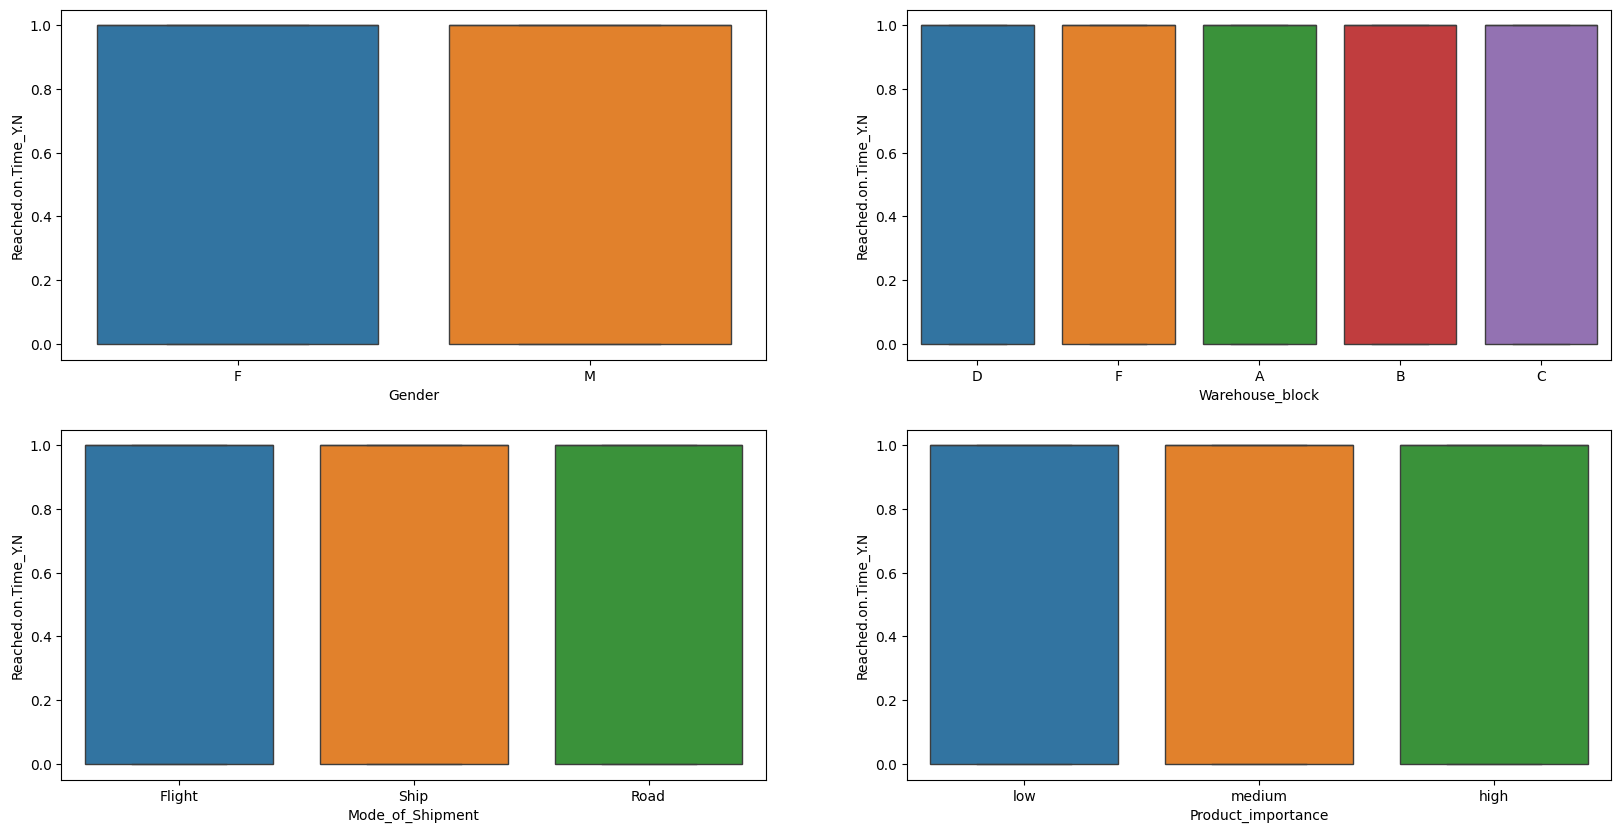

In [ ]:
plt.figure(figsize=(20,10))
j=1
for i in categorical_features:
  plt.subplot(2,2,j)
  j=j+1
  sns.boxplot(data=data,x=i,y="Reached.on.Time_Y.N", hue=i)
plt.show()

**Correlation with heat map to interpret the relation and multicolinearity**

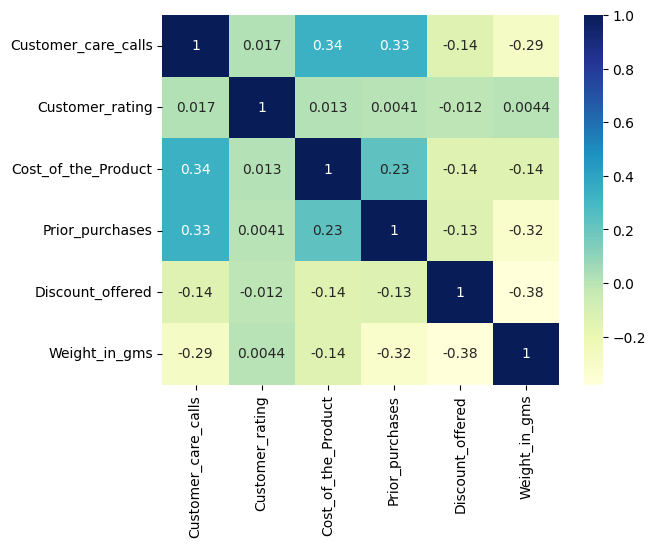

In [ ]:
heatmap = sns.heatmap(data[numerical_features].corr(), cmap='YlGnBu', annot=True)

**Applying OHE on categorical features to convert categorical data to numerical data**

In [ ]:
cat_data=pd.get_dummies(data[categorical_features],dtype=int,drop_first=True)

In [ ]:
cat_data.head()

,Gender_M,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium
0,0,0,0,1,0,0,0,1,0
1,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1


In [ ]:
data = pd.concat([data,cat_data],axis=1)

In [ ]:
data.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Gender_M,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium
0,1,4,2,177.0,3,44,1233.0,1,0,0,0,1,0,0,0,1,0
1,2,4,5,216.0,2,59,3088.0,1,1,0,0,0,1,0,0,1,0
2,3,2,2,183.0,4,48,3374.0,1,1,0,0,0,0,0,0,1,0
3,4,3,3,176.0,4,10,1177.0,1,1,1,0,0,0,0,0,0,1
4,5,2,2,184.0,3,46,2484.0,1,0,0,1,0,0,0,0,0,1


In [ ]:
data.drop(categorical_features,axis=1,inplace=True)

In [ ]:
data.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Gender_M,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium
0,1,4,2,177.0,3,44,1233.0,1,0,0,0,1,0,0,0,1,0
1,2,4,5,216.0,2,59,3088.0,1,1,0,0,0,1,0,0,1,0
2,3,2,2,183.0,4,48,3374.0,1,1,0,0,0,0,0,0,1,0
3,4,3,3,176.0,4,10,1177.0,1,1,1,0,0,0,0,0,0,1
4,5,2,2,184.0,3,46,2484.0,1,0,0,1,0,0,0,0,0,1


In [ ]:
data.shape

(9996, 17)

**Train and evalute the model**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
def train_test_split_and_scale(data):
  y=data["Reached.on.Time_Y.N"]
  x=data.drop("Reached.on.Time_Y.N",axis=1)
  features=list(x.columns)
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)
  scaler=MinMaxScaler()
  x_train=scaler.fit_transform(x_train)
  x_test=scaler.transform(x_test)
  return x_train,x_test,y_train,y_test,features

In [ ]:
x_train,x_test,y_train,y_test,features=train_test_split_and_scale(data)


In [ ]:
x_train=pd.DataFrame(x_train,columns=features)
x_test=pd.DataFrame(x_test,columns=features)

In [ ]:
x_train.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Gender_M,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium
0,0.524282,0.8,0.00,0.719626,0.666667,0.015625,0.118719,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.913969,0.4,0.25,0.327103,1.000000,0.109375,0.530135,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.491451,0.4,0.50,0.439252,0.666667,0.046875,0.470776,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.019098,0.0,0.00,0.144860,0.333333,0.218750,0.400891,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.299382,0.0,0.75,0.200935,0.666667,0.031250,0.613329,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_train.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Gender_M,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium
count,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000,6997.000000
mean,0.495089,0.409032,0.495998,0.533973,0.399790,0.193951,0.402347,0.498071,0.167215,0.166500,0.165071,0.332428,0.155924,0.686866,0.498642,0.423610
std,0.288505,0.230069,0.353354,0.224479,0.323194,0.253797,0.246269,0.500032,0.373194,0.372555,0.371271,0.471117,0.362809,0.463802,0.500034,0.494165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245908,0.200000,0.250000,0.341121,0.000000,0.046875,0.131471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.492543,0.400000,0.500000,0.546729,0.333333,0.093750,0.477304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.747726,0.600000,0.750000,0.724299,0.666667,0.140625,0.615303,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
Counter(y_test)

Counter({0: 1215, 1: 1784})

In [ ]:
Counter(y_train)

Counter({1: 4188, 0: 2809})

**Create a function to Fit and evaluate the model**

In [ ]:
def fit_and_evaluat_model(x_train,x_test,y_train,y_test,class_weight=None):
  lr=LogisticRegression(class_weight=class_weight)
  model=lr.fit(x_train,y_train)#model training
  lr_predict=lr.predict(x_test)#create predicted
  lr_conf_matrics=confusion_matrix(y_test,lr_predict)
  lr_acc_score=accuracy_score(y_test,lr_predict)
  print("confusion_matrix")
  print(lr_conf_matrics)
  print("\n")
  print("accuracy of logistic regression:",lr_acc_score*100,"\n")
  #lr_report=classification_report(y_test,lr_predict)
  print(classification_report(y_test,lr_predict))
  return model

**Fit and evaluate the model without class weight**

In [ ]:
model=fit_and_evaluat_model(x_train,x_test,y_train,y_test)
print("odds ratio",np.exp(model.coef_))

confusion_matrix
[[ 756  459]
 [ 559 1225]]


accuracy of logistic regression: 66.05535178392797 

              precision    recall  f1-score   support

           0       0.57      0.62      0.60      1215
           1       0.73      0.69      0.71      1784

    accuracy                           0.66      2999
   macro avg       0.65      0.65      0.65      2999
weighted avg       0.67      0.66      0.66      2999

odds ratio [[  0.18848448   0.61415244   1.05971624   0.83862303   0.65140421
  155.19037751   0.18542394   1.04843927   1.18070026   0.9795076
    1.0928988    1.03871892   0.97456361   0.99336605   0.84029255
    0.85737134]]


**Fit and evaluate the model with giving more weight to class which measures the late shipment as buisness is more interested in getting higher accuracy from model for late shipment**

In [ ]:
class_weight={0:3,1:1}
model=fit_and_evaluat_model(x_train,x_test,y_train,y_test, class_weight)
print("odds ratio",np.exp(model.coef_))

confusion_matrix
[[1211    4]
 [ 952  832]]


accuracy of logistic regression: 68.12270756918973 

              precision    recall  f1-score   support

           0       0.56      1.00      0.72      1215
           1       1.00      0.47      0.64      1784

    accuracy                           0.68      2999
   macro avg       0.78      0.73      0.68      2999
weighted avg       0.82      0.68      0.67      2999

odds ratio [[1.39046964e-01 5.66613095e-01 1.05020455e+00 7.58152594e-01
  6.18687503e-01 4.18640322e+02 1.40583918e-01 1.05407149e+00
  1.18448793e+00 9.90803850e-01 1.07841095e+00 1.03009784e+00
  9.52508343e-01 9.77008438e-01 8.34037915e-01 8.63028966e-01]]


***Trying to get model from RandomForestClassifier, which randomly select the fetures and data sets to create different combination of Decision trees and selects the DT which gives the best result.***

In [ ]:
param_grid=[{
                'max_depth':[3,5,7,10,13,15,17],
                'min_samples_split':[0.01,0.03,0.05,0.07,0.09,0.1],
                'max_features':[0.3,0.5,0.7,0.8,0.9,1.0],
                'max_samples':[0.3,0.5,0.7,0.8,0.9,1.0]
            }]

**For the above hyperparameters config, the best parameters from GridSearchCV are** : max_depth=5,max_features=0.8,max_samples=0.7,min_samples_split=0.09

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def fit_and_evaluat_model(x_train,x_test,y_train,y_test, max_depth=5,max_features=0.8,max_samples=0.7,min_samples_split=0.09):
  rf=RandomForestClassifier(random_state=0,max_depth=max_depth,min_samples_split=min_samples_split,max_features=max_features,max_samples=max_samples)
  model=rf.fit(x_train,y_train)#model training
  rf_predict=rf.predict(x_test)#create predicted
  rf_conf_matrics=confusion_matrix(y_test,rf_predict)
  rf_acc_score=accuracy_score(y_test,rf_predict)
  print("confusion_matrix")
  print(rf_conf_matrics)
  print("\n")
  print("accuracy of RandomForest :",rf_acc_score*100,"\n")
  print(classification_report(y_test,rf_predict))
  return model

In [ ]:
model=fit_and_evaluat_model(x_train,x_test,y_train,y_test)

confusion_matrix
[[1213    2]
 [ 918  866]]


accuracy of RandomForest : 69.32310770256753 

              precision    recall  f1-score   support

           0       0.57      1.00      0.73      1215
           1       1.00      0.49      0.65      1784

    accuracy                           0.69      2999
   macro avg       0.78      0.74      0.69      2999
weighted avg       0.82      0.69      0.68      2999



**Conclusion:**
*   If we are removing the ID column the accuracy is being reduced by approx 3%.
*   We are trying to optimize the model around improving the accuracy for shipment arriving late.
*   To increase the accuracy of shipment arriving late (class 0), I incresed the class 0 weight as it is more crucial for business than class 1.

*   Finally the accuracy of LogisticRegression Model is ~68%
*   The accuracy of RandomForestClassifier Model is ~69%.

